In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_palette('muted')

In [2]:
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [3]:
df = pd.read_csv("Telco-Customer-Churn-Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning and Transformation

In [5]:
#Checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There are no missing values in the dataset.

In [6]:
#checking duplicate records
df.duplicated().sum()

0

- There are no duplicate records.

In [7]:
#checking if customerID is duplicated or not
df['customerID'].duplicated().sum()

0

- There are no duplicate entries based on customerID.

In [8]:
df.loc[df['TotalCharges'] == ' ', ['TotalCharges', 'tenure']]

,TotalCharges,tenure
488,,0
753,,0
936,,0
1082,,0
1340,,0
3331,,0
3826,,0
4380,,0
5218,,0
6670,,0


- The datatype of column TotalCharges should be float but it is of object.
- It is observed that there are blanks in TotalCharges of customers whose tenure is 0 which means, they have just started the service and no total charges are recorded.

In [9]:
#replacing blanks with 0 and converting column to float
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Converting 0 and 1 values of SeniorCitizen column to No and Yes for easy understanding.

In [11]:
df['SeniorCitizen'].unique()

array([0, 1])

In [12]:
def conv_senior_citizen(val):
    if val == 0:
        return 'No'
    else:
        return 'Yes'
    

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv_senior_citizen)

In [13]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Descriptive analysis

df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [15]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
# To save transformed data, if required.
df.to_csv("Transformed-Telco-Customer-Churn.csv", index=False)

# Data Visualization

## Overall Churn Rate

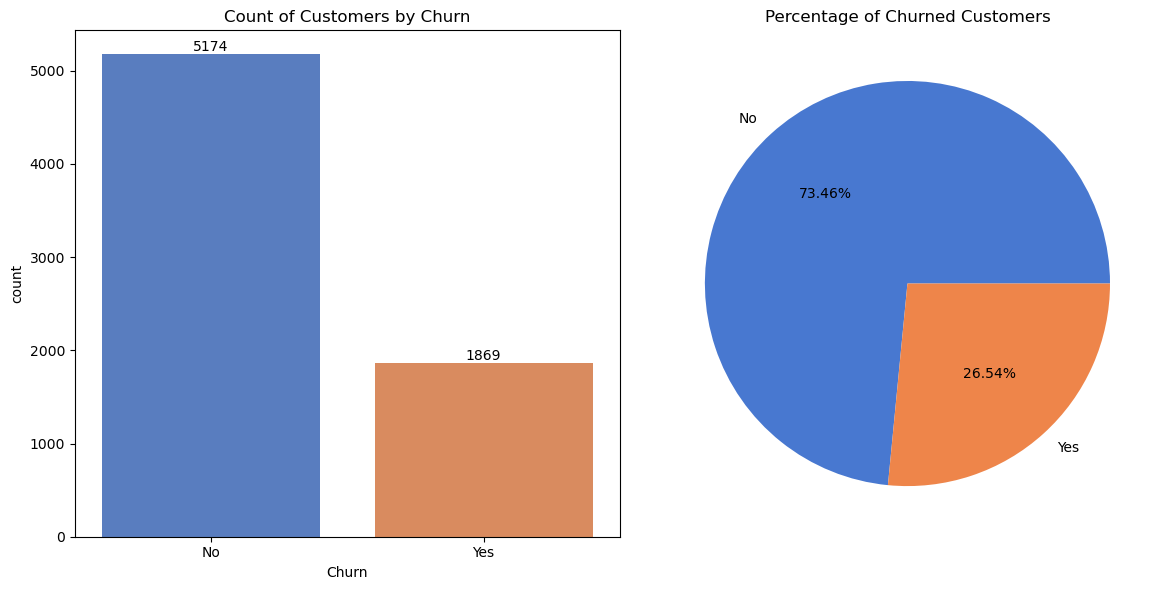

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 6))

sns.countplot(x = 'Churn', data = df, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Customers by Churn')

gb = df.groupby('Churn').agg({'Churn' : 'count'})

axes[1].pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
axes[1].set_title('Percentage of Churned Customers')

plt.tight_layout()
plt.show()

- The churn rate is approximately **26.54%**, meaning that more than 1 in 4 customers have discontinued the service.
- This high churn rate is a key concern and requires investigation into potential causes like pricing, service issues, or contract terms.

In [18]:
#Function to create a stacked plot of column based on Churn

def churn_based_plot(col, ax):
    # Calculate the percentages
    total_counts = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()

    # Plot the bars
    total_counts.plot(kind='bar', stacked=True, ax=ax)

    # Add percentage labels on the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x + width / 2, y + height / 2, f'{height*100:.1f}%', ha='center', va='center')
        
    return ax

## Churn by Gender

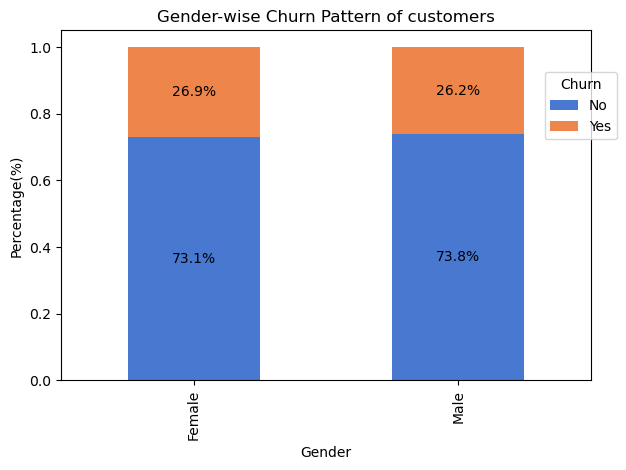

In [19]:
fig, ax = plt.subplots()
churn_based_plot('gender', ax)
ax.set_title('Gender-wise Churn Pattern of customers')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage(%)')
ax.legend(title='Churn', bbox_to_anchor=(0.9, 0.9))

plt.tight_layout()
plt.show()

- Churn rates are almost evenly distributed between male and female customers, suggesting that **gender does not play a significant role** in customer retention or churn.

## Churn by Senior Citizen Status

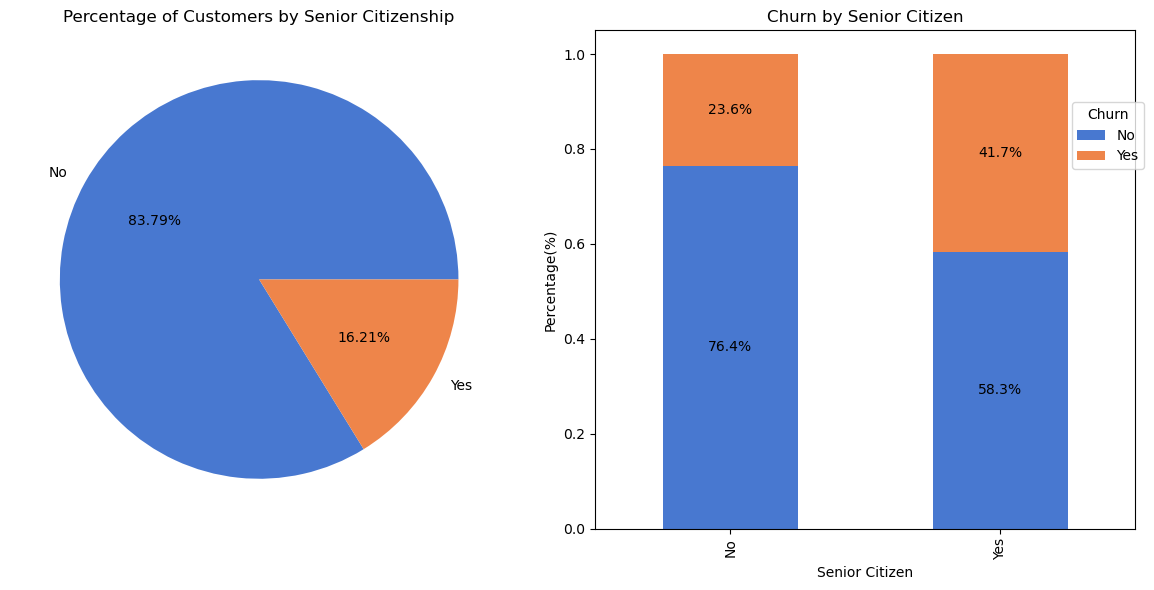

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12, 6))

gb = df.groupby('SeniorCitizen').agg({'SeniorCitizen' : 'count'})
axes[0].pie(gb['SeniorCitizen'], labels = gb.index, autopct = '%1.2f%%')
axes[0].set_title('Percentage of Customers by Senior Citizenship')

churn_based_plot('SeniorCitizen', axes[1])
axes[1].set_title('Churn by Senior Citizen')
axes[1].set_xlabel('Senior Citizen')
axes[1].set_ylabel('Percentage(%)')
axes[1].legend(title='Churn', bbox_to_anchor=(0.87, 0.87))

plt.tight_layout()
plt.show()

- From the given subplot, we conclude that there are only **16.21%** of senior citizen customers.
- Senior citizens show a slightly **higher churn rate** than younger customers, which may require targeted retention strategies for elderly users, possibly with simplified plans or better support.

## Churn by Customer Tenure

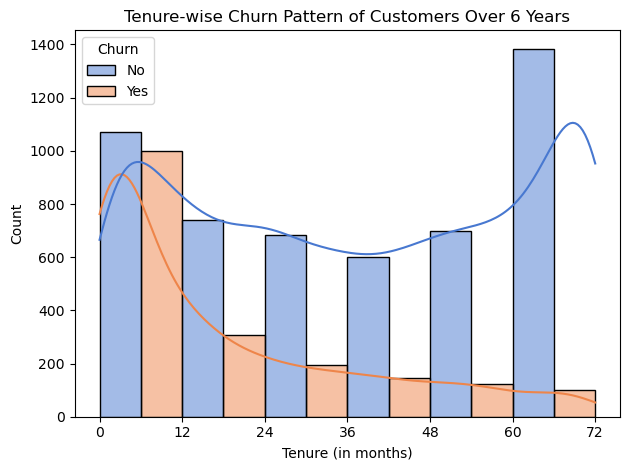

In [21]:
sns.histplot(x = 'tenure', data = df, bins = 6, hue = 'Churn', kde = True, multiple = 'dodge')
plt.xticks(ticks = range(0, 73, 12))
plt.xlabel("Tenure (in months)")
plt.title("Tenure-wise Churn Pattern of Customers Over 6 Years")
plt.tight_layout()
plt.show()

- Most churn is observed in customers with a **tenure of less than 12 months**, suggesting early dissatisfaction or onboarding issues.
- Longer-tenured customers show greater stability and loyalty.

## Churn by Contract Type

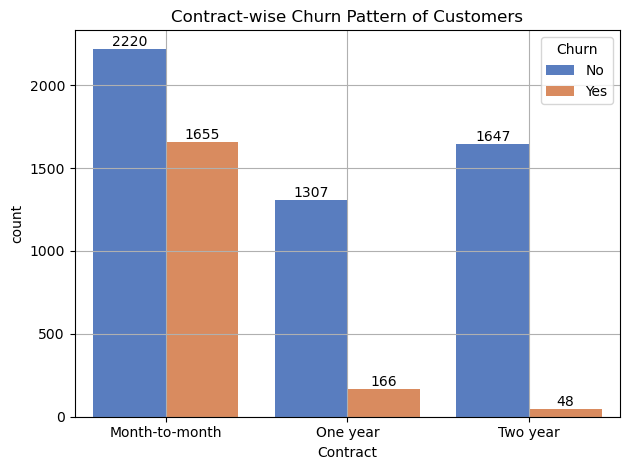

In [22]:
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')

plt.title('Contract-wise Churn Pattern of Customers')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.grid(True)
plt.tight_layout()
plt.show()

- Customers with **Month-to-month contracts** have the **highest churn rate**, while those with **two-year contracts** churn the least.
- This indicates that longer-term contracts contribute to better customer retention and loyalty.

## Churn by Payment Method

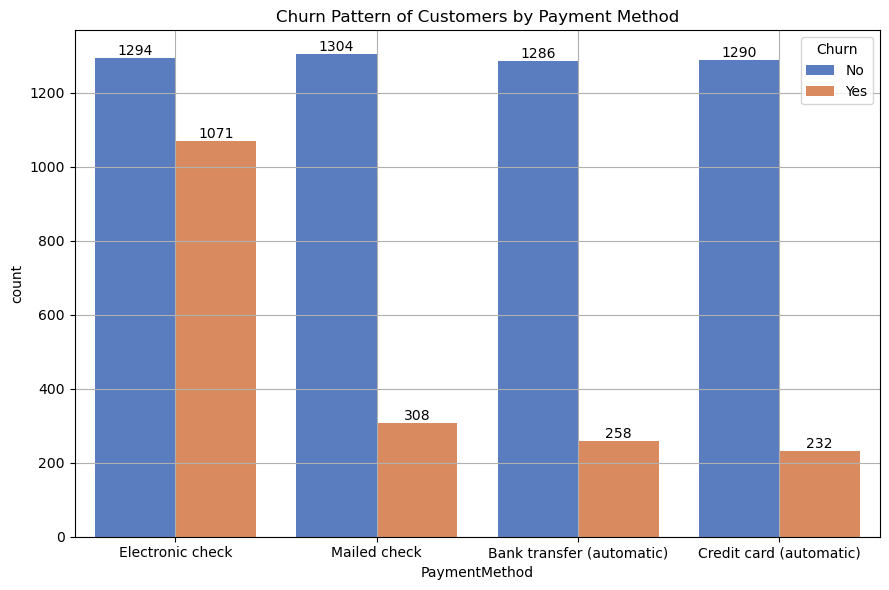

In [23]:
plt.figure(figsize = (9, 6))

ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn Pattern of Customers by Payment Method')

plt.grid(True)
plt.tight_layout()
plt.show()

- Customers who use **Electronic Check** as their payment method have a **significantly higher churn rate** compared to other methods. This could indicate that such customers are more price-sensitive or less committed to the service.

- On the other hand, customers who use **automatic payments via Bank Transfer or Credit Card** tend to churn much less. These payment methods may be associated with higher customer trust or convenience, suggesting that **encouraging auto-pay options could help reduce churn**.


## Churn Patterns by Service Usage and Customer Attributes

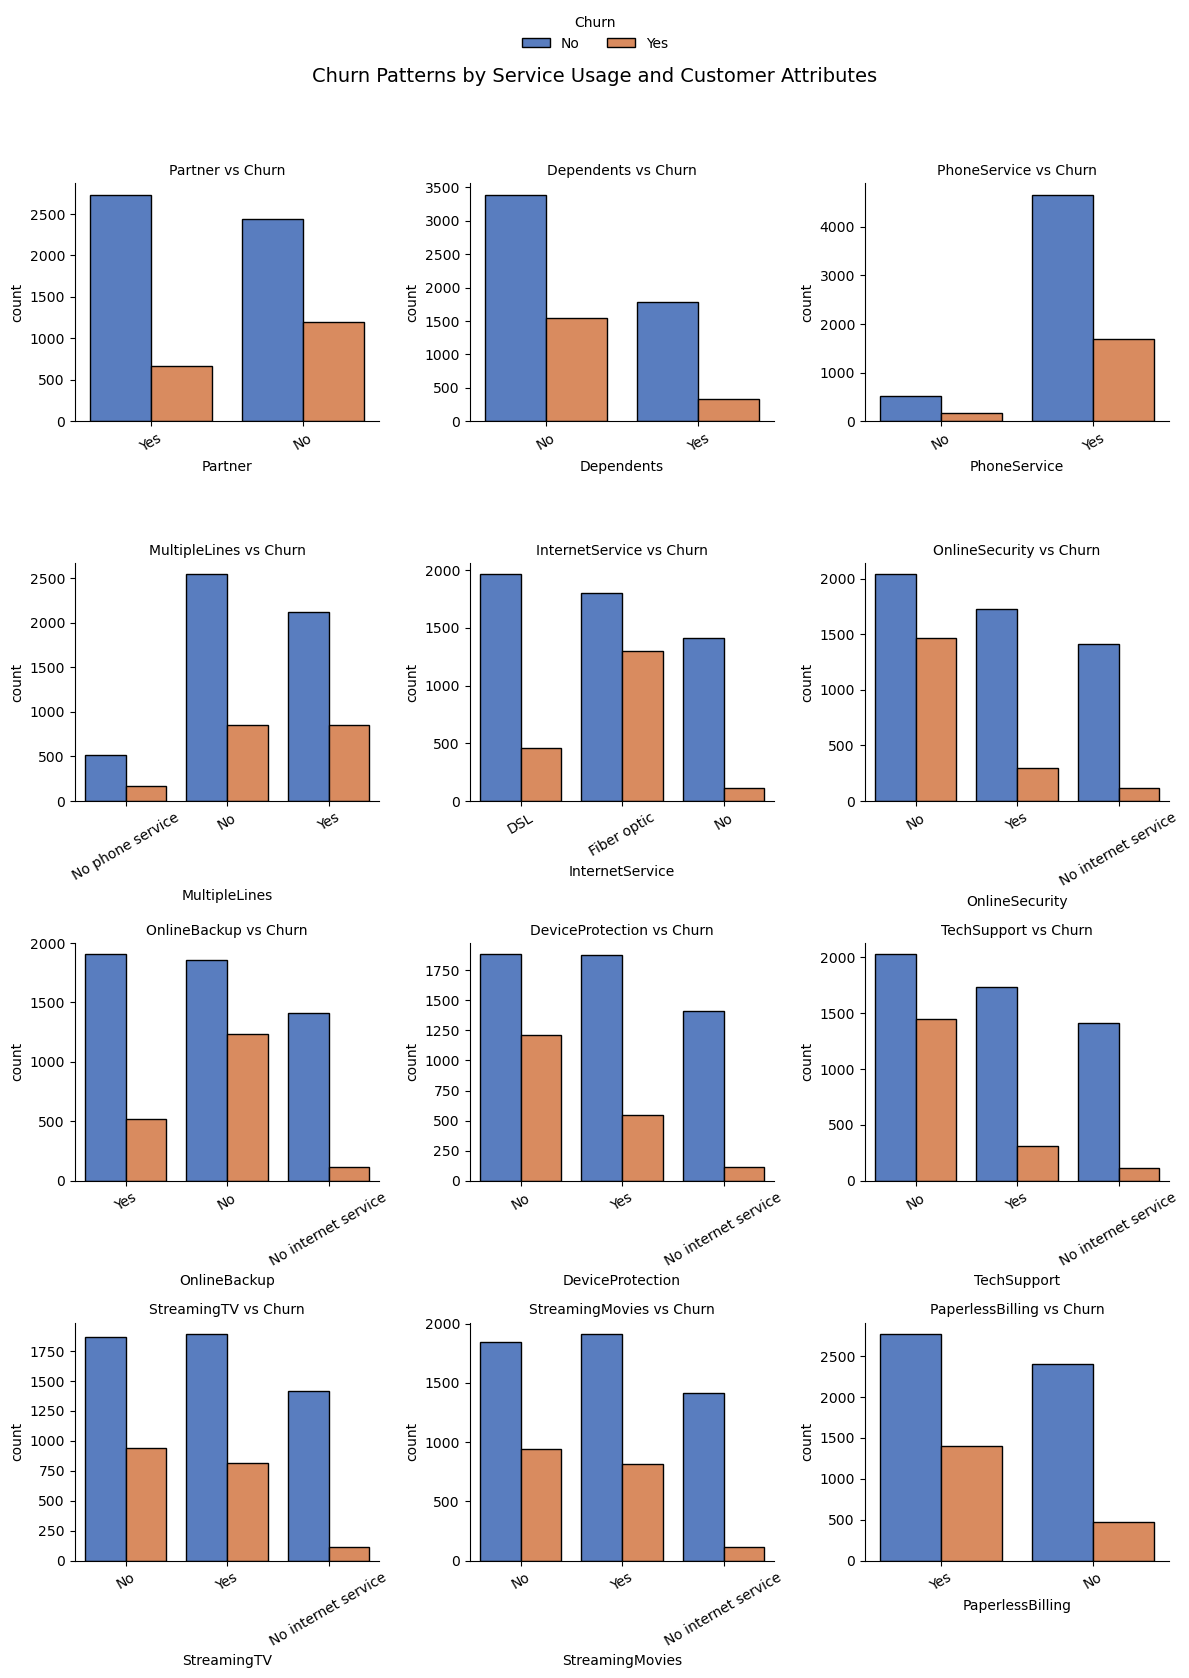

In [24]:
columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'PaperlessBilling']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize = (12, 16))
axes = axes.flatten()
    
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{col} vs Churn', fontsize=10)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].legend_.remove()
    sns.despine(ax=axes[i])


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper center', ncol=2, frameon=False, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Churn Patterns by Service Usage and Customer Attributes', fontsize=14, y = 1.01)    

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Observation of above plots:

**1. Partner & Dependents**
- Customers without a partner or dependents are more likely to churn.
- Suggests that single or less family-tied individuals are more churn-prone.

**2. PhoneService & MultipleLines**
- Churn rate is slightly higher among customers with multiple lines.
- Customers without phone service churn less — likely a small group.

**3. InternetService**
- Fiber optic customers churn the most, followed by those with DSL.
- Customers with no internet service rarely churn, likely because they have minimal services to begin with.

**4. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**
In all four:
- Customers who do not use these services are much more likely to churn.
- Indicates that value-added services increase retention.

**5. StreamingTV & StreamingMovies**
- Slightly higher churn among customers using streaming services.
- But the difference isn’t as strong as with security/tech services.

**6. PaperlessBilling**
- Customers using paperless billing churn more than those who don’t.
- Could indicate more tech-savvy, short-term or online-only customers.

Overall:
Customers who use fewer services or value-added features (like backup, support, security) are significantly more likely to churn. Promoting these services may help increase retention.

## Churn by Monthly Charges

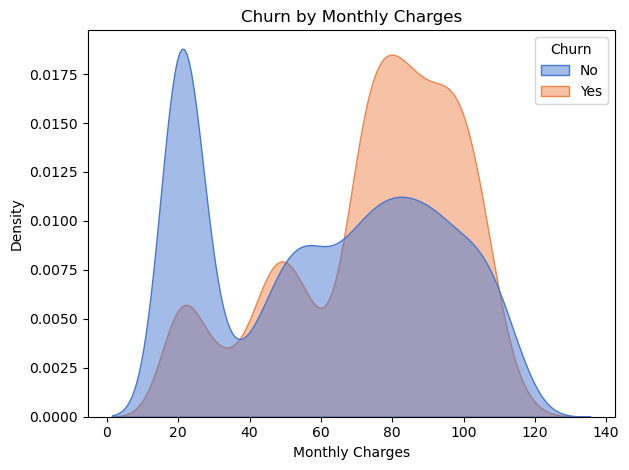

In [25]:
sns.kdeplot(x = 'MonthlyCharges', data = df, hue = 'Churn', fill = True, alpha = 0.5, common_norm = False)
plt.xlabel("Monthly Charges")
plt.title("Churn by Monthly Charges")
plt.tight_layout()
plt.show()

- Customers with **higher monthly charges** are more likely to churn. 
- This implies that pricing sensitivity could be a key churn driver, especially if the perceived value does not match the cost.

## Churn by Total Charges

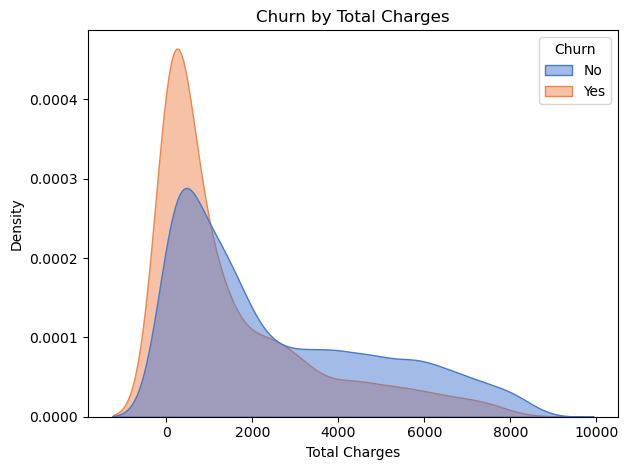

In [26]:
sns.kdeplot(x = 'TotalCharges', data = df, hue = 'Churn', fill = True, alpha = 0.5, common_norm = False)
plt.xlabel("Total Charges")
plt.title("Churn by Total Charges")
plt.tight_layout()
plt.show()

- **Lower total charges** leads to more churn.
- This typically reflects **newer customers** who haven’t stayed long enough to accumulate high charges — early-stage churn is a major issue.

## Total Charges vs Monthly Charges – Churn Insight

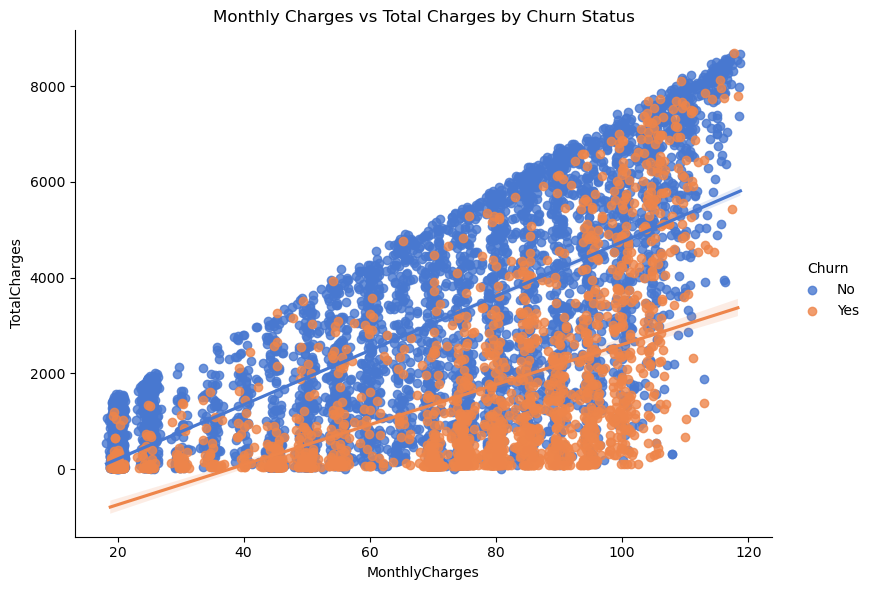

In [27]:
lr = sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn', height=6, aspect=1.2)
lr._legend.set_bbox_to_anchor((1.1, 0.5))
plt.title('Monthly Charges vs Total Charges by Churn Status')
plt.tight_layout()
plt.show()

A clear **positive linear relationship** exists between Monthly Charges and Total Charges.

- The **blue line (No Churn)** has a **steeper slope**, indicating that non-churned customers have accumulated higher total charges over time — likely because they stayed longer.
- The **orange line (Churn)** shows a **flatter slope**, as churned customers typically leave early, accumulating lower total charges even when their monthly charges are high.
- Many churned customers (orange dots) cluster in the **low Total Charges** range, even with high monthly bills — suggesting early exits.

### **Conclusion**:
- Customers who pay **high monthly charges but leave early** may perceive **low value for money** or be more **cost-sensitive**.  
- This group should be **targeted with early retention offers**, **onboarding incentives**, or **customized value bundles** to reduce early churn.
